In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.4 MB/s eta 0:00:00
   

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
import os

# Nieuwe outputmap in je Drive
data_path = "/content/drive/MyDrive/roboflow_dataset_nieuw"
os.makedirs(data_path, exist_ok=True)

# Stel de werkdirectory van YOLO in
os.chdir(data_path)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="....")
project = rf.workspace("tata-steel-zabde").project("amr2-yviht")
version = project.version(7)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AMR2-7 in yolov11:: 100%|██████████| 2896/2896 [00:17<00:00, 170.16it/s]


In [ ]:
data_yaml_path = "/content/drive/MyDrive/roboflow_dataset_nieuw/AMR2-7/data.yaml"

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolo11n.pt")

In [ ]:
import os

# Nieuwe outputmap in je Drive
drive_runs_path = "/content/drive/MyDrive/yolo_runs"
os.makedirs(drive_runs_path, exist_ok=True)

# Stel de werkdirectory van YOLO in
os.chdir(drive_runs_path)


In [ ]:
model.train(
    data= data_yaml_path,
    epochs=500,
    imgsz=160,
    batch=16,
    device=0,
    seed = 1201,
 # Geometrische augmentaties
    degrees=5,             # +/- 15 graden rotatie
    shear=3,               # +/- 15 shear
    flipud=0,             # verticale flip kans
    fliplr=0,             # horizontale flip kans

    # Photometric augmentaties (licht, contrast, blur etc.)
    hsv_h=0.003,            # kleurtint
    hsv_s=0.1,              # saturatie (brightness ~)
    hsv_v=0.1,              # brightness
    erasing = 0,
    mosaic = 0,
    patience=30
);

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo_runs/runs/detect/train2/weights/best.pt, data=/content/drive/MyDrive/roboflow_dataset_nieuw/AMR2-7/data.yaml, epochs=500, time=None, patience=30, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=1201, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning /content/drive/MyDrive/roboflow_dataset_nieuw/AMR2-7/train/labels.cache... 865 images, 14 backgrounds, 0 corrupt: 100%|██████████| 865/865 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 862. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/roboflow_dataset_nieuw/AMR2-7/valid/labels.cache... 287 images, 5 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500     0.777G      1.269     0.8868     0.9808          1        160: 100%|██████████| 55/55 [00:07<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.62it/s]

                   all        287        285       0.93       0.89       0.93      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500     0.793G       1.26     0.7363     0.9637          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        287        285      0.906      0.913       0.95      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500     0.807G      1.194     0.6746     0.9493          1        160: 100%|██████████| 55/55 [00:06<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        287        285      0.916      0.884      0.938      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500     0.807G      1.186     0.6997      0.938          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.09it/s]

                   all        287        285      0.927      0.895      0.948      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500     0.807G      1.193     0.6874     0.9481          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]

                   all        287        285      0.905      0.926      0.937      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500     0.807G      1.227     0.6989     0.9433          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]

                   all        287        285      0.935      0.916       0.95      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500     0.807G      1.193     0.6763     0.9447          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        287        285      0.951      0.881      0.954      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500     0.807G      1.205     0.6708     0.9341          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.25it/s]

                   all        287        285      0.937      0.905      0.951      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500     0.807G      1.217     0.7193     0.9271          2        160: 100%|██████████| 55/55 [00:05<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.55it/s]

                   all        287        285       0.94      0.909      0.949      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500     0.814G       1.18     0.6655     0.9275          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.88it/s]

                   all        287        285      0.941      0.912      0.952      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      0.83G      1.124     0.6425     0.9336          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        287        285      0.945        0.9      0.946       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500     0.844G      1.153     0.6497      0.929          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.65it/s]

                   all        287        285      0.949       0.91      0.964      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500     0.844G      1.159     0.6424     0.9275          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        287        285      0.946      0.918      0.951      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500     0.844G      1.162      0.644     0.9306          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.45it/s]

                   all        287        285      0.948      0.903       0.94      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500     0.844G       1.15     0.6492     0.9262          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.33it/s]

                   all        287        285      0.947      0.912      0.957      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500     0.844G      1.157     0.6534     0.9326          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]

                   all        287        285      0.948      0.896      0.956      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500     0.844G      1.152     0.6383     0.9193          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        287        285      0.963      0.907      0.965      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500     0.844G      1.154     0.6488     0.9292          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        287        285       0.95      0.895      0.955      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500     0.844G      1.186     0.6641     0.9228          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        287        285      0.935      0.904      0.961      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500     0.844G      1.139     0.6436     0.9193          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        287        285      0.933      0.909      0.953      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500     0.844G      1.144     0.6325     0.9157          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.02it/s]

                   all        287        285      0.949      0.916      0.954      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500     0.844G      1.097     0.6242     0.9138          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        287        285      0.962      0.897      0.957      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500     0.844G      1.118     0.6411     0.9106          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.37it/s]

                   all        287        285      0.958      0.909      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500     0.844G      1.146     0.6415     0.9161          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        287        285      0.926       0.94      0.962      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500     0.844G      1.112     0.6172     0.9214          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        287        285      0.956      0.919      0.966      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500     0.844G      1.122     0.6217     0.9157          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.58it/s]

                   all        287        285      0.943       0.94      0.962      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500     0.844G      1.122     0.6249     0.9108          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.42it/s]

                   all        287        285      0.953      0.919      0.964      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500     0.844G      1.099     0.6142     0.9195          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.80it/s]

                   all        287        285       0.96       0.92      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500     0.844G      1.123     0.6617     0.9102          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        287        285      0.964      0.929      0.969      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500     0.844G      1.126     0.6166      0.984          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]

                   all        287        285      0.942      0.937      0.961      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500     0.844G      1.087     0.6298     0.8964          0        160: 100%|██████████| 55/55 [00:05<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]

                   all        287        285      0.938       0.93      0.953      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500     0.844G      1.062     0.6379     0.8913          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        287        285       0.93      0.923      0.958      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500     0.844G      1.081     0.5873      0.912          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        287        285      0.933      0.931      0.963      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500     0.844G        1.1     0.6169     0.9049          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]

                   all        287        285      0.931       0.93      0.953      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500     0.844G      1.067     0.6077     0.8964          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        287        285      0.934      0.933      0.963      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500     0.844G      1.105     0.6059     0.9191          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        287        285      0.949      0.922      0.961      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500     0.844G      1.093     0.6052     0.9104          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]

                   all        287        285      0.963      0.923      0.967      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500     0.844G      1.121     0.6453     0.9219          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        287        285      0.967       0.93      0.966       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500     0.844G      1.083     0.5928     0.9066          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.22it/s]

                   all        287        285       0.97      0.917      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500     0.844G      1.088      0.597     0.9038          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]

                   all        287        285      0.965      0.909      0.962      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500     0.844G       1.05     0.5748     0.8931          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        287        285      0.939      0.926      0.965      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500     0.844G      1.047     0.5675     0.9041          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        287        285      0.949      0.918      0.963        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500     0.844G      1.031     0.5847     0.9031          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]

                   all        287        285      0.957      0.923      0.972      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500     0.844G      1.094     0.5902     0.9024          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.57it/s]

                   all        287        285      0.948      0.902      0.964      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500     0.844G      1.066     0.5873     0.8955          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        287        285      0.966      0.909      0.965      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500     0.844G      1.075     0.5796     0.9017          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]

                   all        287        285      0.944      0.937      0.967      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500     0.844G       1.04     0.5798     0.9004          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        287        285      0.962       0.93       0.97      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500     0.844G      1.092     0.6121     0.9131          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.17it/s]

                   all        287        285      0.943       0.93      0.966      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500     0.844G      1.031     0.5711     0.8967          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.15it/s]

                   all        287        285      0.938      0.933      0.964       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500     0.844G      1.064     0.5769     0.8974          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.92it/s]

                   all        287        285      0.947      0.942      0.962      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500     0.844G      1.116     0.5945     0.9114          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        287        285       0.94      0.933      0.963       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500     0.844G      1.014     0.5601     0.8961          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]

                   all        287        285      0.939      0.919      0.952      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500     0.844G      1.055     0.5798      0.895          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all        287        285      0.936      0.919       0.96      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500     0.844G      1.056     0.5785     0.8912          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        287        285       0.97      0.909      0.967      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500     0.844G      1.054     0.5791     0.8927          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        287        285      0.967      0.909      0.963      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500     0.844G      1.037      0.568     0.8955          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        287        285      0.939      0.917      0.963      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500     0.844G      1.048     0.5664     0.8959          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]

                   all        287        285      0.963      0.909      0.963      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500     0.844G      1.047     0.5762     0.8931          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]

                   all        287        285       0.94      0.926       0.96      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500     0.844G      1.086     0.6305     0.9104          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]

                   all        287        285      0.916      0.933      0.953      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500     0.844G       1.05      0.564     0.9045          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        287        285      0.943      0.921      0.954      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500     0.859G      1.081     0.5752     0.9141          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.29it/s]

                   all        287        285      0.959       0.93      0.969      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500     0.859G      1.029     0.5647     0.8889          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]

                   all        287        285      0.969       0.93      0.975      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500     0.859G      1.033     0.5533     0.8944          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.58it/s]

                   all        287        285      0.948      0.897      0.947       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500     0.859G      1.015     0.5571     0.8936          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        287        285      0.951       0.93      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500     0.859G      1.041     0.5932     0.8999          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.02it/s]

                   all        287        285      0.933      0.944       0.97      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500     0.859G      1.046     0.5851     0.9005          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.37it/s]

                   all        287        285      0.956      0.891      0.958      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500     0.859G      1.037      0.565     0.8881          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]

                   all        287        285      0.955      0.912      0.963      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500     0.859G      1.033     0.5593     0.8961          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        287        285      0.957      0.937      0.963      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500     0.859G          1     0.5367     0.8783          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.23it/s]

                   all        287        285      0.955      0.926       0.97      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500     0.859G      1.015     0.5483     0.8945          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        287        285      0.938       0.94      0.961      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500     0.859G     0.9719      0.531     0.8822          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]

                   all        287        285      0.947       0.94       0.96      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500     0.859G       1.02     0.5522      0.885          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        287        285      0.938      0.912      0.947        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500     0.859G       1.03     0.5602     0.8909          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]

                   all        287        285      0.935      0.954      0.962      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500     0.859G      1.006     0.5537     0.8943          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.58it/s]

                   all        287        285      0.957       0.94      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500     0.859G      1.003     0.5472     0.8869          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]

                   all        287        285      0.947      0.941      0.962      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500     0.859G     0.9987     0.5446     0.8826          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        287        285      0.953      0.931      0.964      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500     0.859G      1.008     0.5448     0.8886          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]

                   all        287        285      0.955      0.926      0.967      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500     0.859G     0.9986     0.5426     0.8806          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.61it/s]

                   all        287        285      0.964      0.912      0.965      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500     0.859G      1.009     0.5529     0.9019          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        287        285      0.954       0.94      0.976      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500     0.859G     0.9634      0.536     0.8779          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        287        285      0.946      0.926      0.967      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500     0.859G     0.9977     0.5315     0.8818          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        287        285      0.953       0.94       0.97      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500     0.859G     0.9991     0.5564     0.8857          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.55it/s]

                   all        287        285      0.952      0.901      0.949       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500     0.859G     0.9933      0.538     0.8825          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        287        285      0.934      0.937      0.943      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500     0.859G     0.9566     0.5279      0.876          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        287        285      0.953      0.926      0.951      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500     0.859G      1.004     0.5534     0.8894          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.89it/s]

                   all        287        285      0.947      0.933      0.952      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500     0.859G     0.9947     0.5488     0.8878          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.27it/s]

                   all        287        285       0.94      0.954      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500     0.859G     0.9854     0.5397     0.8755          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]

                   all        287        285      0.957      0.948      0.963      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500     0.859G     0.9701      0.551     0.8766          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        287        285      0.942      0.947      0.969      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500     0.859G      0.987     0.5441     0.8898          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        287        285      0.947      0.954       0.97       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500     0.859G      0.974     0.5311     0.8845          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]

                   all        287        285      0.954      0.937      0.948       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500     0.859G     0.9576     0.5605     0.8617          0        160: 100%|██████████| 55/55 [00:05<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        287        285      0.957      0.934       0.96      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500     0.859G     0.9867     0.5355     0.8776          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        287        285       0.96      0.933      0.966      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500     0.859G     0.9801     0.5257      0.874          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.23it/s]

                   all        287        285      0.952      0.954      0.973      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500     0.859G     0.9888     0.5248     0.8741          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        287        285      0.937      0.958      0.968      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500     0.859G      1.015      0.531     0.8827          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.49it/s]

                   all        287        285      0.957      0.934      0.965      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500     0.859G     0.9731     0.5517     0.8661          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        287        285      0.952      0.944      0.972      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500     0.859G     0.9853     0.5631     0.8822          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.92it/s]

                   all        287        285      0.976      0.933      0.971      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500     0.859G     0.9657      0.542     0.8574          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]

                   all        287        285      0.967      0.921      0.967      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500     0.859G     0.9792     0.5214     0.8847          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]

                   all        287        285      0.959      0.909      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500     0.859G     0.9599     0.5269     0.8741          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.09it/s]

                   all        287        285       0.95      0.933      0.968      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500     0.859G     0.9301     0.5124     0.8742          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        287        285      0.955      0.926      0.972      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500     0.859G     0.9603     0.5137     0.8833          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.33it/s]

                   all        287        285      0.957      0.951      0.973      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500     0.859G     0.9618     0.5165     0.8732          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.23it/s]

                   all        287        285      0.939      0.964      0.962      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500     0.859G     0.9991     0.5167     0.8901          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]

                   all        287        285      0.945      0.919      0.964      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500     0.859G     0.9854     0.5118     0.8764          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]

                   all        287        285      0.951      0.952       0.97      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500     0.859G     0.9955     0.5284     0.8938          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]

                   all        287        285      0.933      0.944      0.962      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500     0.859G      0.973     0.5141     0.8756          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        287        285       0.94      0.951      0.956      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500     0.859G       0.95     0.5103     0.8817          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.23it/s]

                   all        287        285      0.961      0.954      0.969      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500     0.859G     0.9563     0.5099     0.8852          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        287        285      0.974      0.911      0.971      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500     0.859G     0.9211     0.4999     0.8755          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]

                   all        287        285      0.965      0.937       0.97      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500     0.859G     0.9555     0.5176      0.874          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.24it/s]

                   all        287        285      0.958      0.947      0.966      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500     0.859G     0.9353     0.5154     0.8755          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]

                   all        287        285      0.956      0.947      0.965      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500     0.859G     0.9484     0.5064     0.8702          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.81it/s]

                   all        287        285      0.959       0.93      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500     0.859G      0.983     0.5134     0.8769          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.87it/s]

                   all        287        285      0.955       0.96      0.972      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500     0.859G     0.9555     0.5063     0.8708          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.09it/s]

                   all        287        285      0.962      0.923      0.965      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500     0.859G     0.9627     0.5131     0.8746          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]

                   all        287        285      0.929      0.958      0.967      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500     0.859G     0.9376      0.511     0.8734          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        287        285      0.957       0.94      0.961      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500     0.859G     0.9389     0.5017     0.8674          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]

                   all        287        285      0.968       0.94      0.966      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500     0.859G     0.9426     0.5043     0.8663          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        287        285      0.927      0.947      0.964      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500     0.859G      0.914     0.5093     0.8646          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]

                   all        287        285      0.957      0.944      0.969       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500     0.859G     0.9483     0.4991      0.871          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        287        285       0.96       0.93      0.959      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500     0.859G     0.9538     0.5072     0.8726          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        287        285      0.936      0.926      0.949      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500     0.859G     0.9484     0.5047     0.8763          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]

                   all        287        285       0.93      0.938      0.957      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500     0.859G     0.9591     0.5208     0.8731          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        287        285      0.951      0.965       0.97      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500     0.859G     0.9906     0.5204     0.8889          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        287        285      0.958       0.95      0.976       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500     0.859G     0.9268     0.4946     0.8771          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        287        285      0.954      0.938      0.964      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500     0.859G     0.9427     0.5023     0.8735          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        287        285      0.961      0.944      0.966       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500     0.859G     0.9823     0.5129     0.8955          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        287        285      0.973      0.923      0.972      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500     0.859G     0.9507     0.5035     0.8658          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.31it/s]

                   all        287        285      0.967      0.937      0.968      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500     0.859G     0.9678     0.5052     0.8806          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]

                   all        287        285      0.962      0.923       0.96      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500     0.859G     0.9563     0.5084     0.8711          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        287        285      0.964      0.936      0.959      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500     0.859G     0.9583     0.5213     0.8729          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        287        285      0.963      0.933      0.964      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500     0.859G     0.9437     0.5139      0.869          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.29it/s]

                   all        287        285      0.954       0.94      0.971       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500     0.859G     0.9272     0.4953     0.8679          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]

                   all        287        285      0.961       0.94      0.972      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500     0.859G     0.9236     0.4996     0.8592          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.10it/s]

                   all        287        285      0.957      0.946      0.969      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500     0.859G     0.9389     0.4948     0.8622          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        287        285      0.957       0.93      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500     0.859G     0.9362     0.5048     0.8678          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]

                   all        287        285      0.951      0.948       0.97      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500     0.859G     0.9438     0.5079     0.8649          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]

                   all        287        285      0.972       0.93      0.977      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500     0.859G     0.9681     0.5374     0.8869          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        287        285      0.963      0.951      0.969      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500     0.859G     0.9185      0.493     0.8712          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]

                   all        287        285       0.96      0.933      0.959      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500     0.859G     0.9484     0.4986     0.8696          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        287        285      0.952      0.933      0.958      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500     0.859G     0.9323     0.5083     0.8735          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.56it/s]

                   all        287        285      0.954      0.933      0.967      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500     0.859G     0.9204     0.5039     0.8743          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]

                   all        287        285      0.968      0.926      0.977      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500     0.859G     0.9154     0.4947     0.8689          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.25it/s]

                   all        287        285      0.964      0.953      0.975      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500     0.859G     0.9439     0.5002     0.8694          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        287        285      0.944      0.939      0.962      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500     0.859G     0.9437     0.4917      0.873          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.52it/s]

                   all        287        285      0.947      0.965      0.971      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500     0.859G     0.9275      0.497     0.8682          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.37it/s]

                   all        287        285      0.961      0.958      0.975      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500     0.859G      0.956     0.4945     0.8761          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.92it/s]

                   all        287        285      0.954      0.965       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500     0.873G     0.9271     0.4825     0.8677          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        287        285      0.968      0.953      0.971      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500     0.873G     0.9231     0.4973     0.8791          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        287        285      0.968      0.958      0.972       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500     0.873G      0.947     0.5148     0.8675          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        287        285       0.96      0.951      0.976      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500     0.873G     0.9141     0.4838     0.8654          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.17it/s]

                   all        287        285      0.952       0.93      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500     0.873G     0.9252     0.5046      0.873          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all        287        285      0.953      0.954      0.971      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500     0.873G     0.9071     0.4754     0.8652          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        287        285      0.971      0.946      0.972      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500     0.873G     0.9239     0.4865     0.8677          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        287        285      0.956      0.954      0.968      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500     0.873G     0.9127     0.4994     0.8638          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        287        285      0.958      0.951      0.963       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500     0.873G      0.885     0.4882     0.8589          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        287        285       0.96       0.93      0.961      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500     0.873G     0.9105     0.4918     0.8698          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.33it/s]

                   all        287        285      0.966      0.944      0.972       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500     0.873G     0.9077     0.4854     0.8601          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.65it/s]

                   all        287        285      0.952      0.965      0.966      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500     0.873G      0.904     0.4819     0.8605          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        287        285      0.961      0.951      0.967      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500     0.873G     0.9547     0.4873     0.8748          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]

                   all        287        285      0.956       0.94      0.967      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500     0.873G     0.9503     0.5381     0.8864          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]

                   all        287        285      0.956      0.954      0.965      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500     0.873G     0.9128     0.4824     0.8663          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        287        285      0.961      0.957      0.971      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500     0.873G     0.9016     0.4832     0.8756          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        287        285      0.968      0.964      0.976      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500     0.873G     0.9125     0.4764     0.8645          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.41it/s]

                   all        287        285      0.964      0.945      0.975      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500     0.873G     0.9145     0.4803     0.8681          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]

                   all        287        285      0.971      0.944      0.964      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500     0.873G     0.8741      0.477     0.8647          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        287        285      0.961      0.947      0.963      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500     0.873G     0.9264     0.4896      0.863          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]

                   all        287        285      0.971      0.932      0.961       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500     0.873G     0.9574     0.4884     0.8729          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.24it/s]

                   all        287        285      0.961      0.951      0.971      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500     0.873G     0.9013      0.485     0.8604          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.22it/s]

                   all        287        285      0.978      0.933      0.974       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500     0.873G     0.8978     0.4806     0.8698          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        287        285      0.985       0.94      0.976      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500     0.873G     0.8794     0.4887     0.8491          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]

                   all        287        285      0.953      0.951      0.976      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500     0.873G     0.8944      0.472     0.8569          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        287        285      0.965      0.962      0.972      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500     0.873G     0.8836     0.4714     0.8594          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.58it/s]

                   all        287        285       0.96      0.947      0.977      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500     0.873G     0.8888     0.4767     0.8567          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        287        285      0.955      0.961      0.975      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500     0.873G     0.9081     0.4773     0.8746          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        287        285      0.961      0.954      0.975      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500     0.873G     0.8903      0.459     0.8585          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        287        285      0.965      0.954      0.966      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500     0.873G     0.9624      0.489     0.8757          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        287        285      0.961      0.956       0.97       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500     0.873G     0.8963     0.4748      0.858          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        287        285      0.974      0.958      0.973      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500     0.873G     0.8951     0.4703     0.8654          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]

                   all        287        285      0.958      0.958      0.976       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500     0.873G     0.8681     0.4684     0.8541          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        287        285      0.964      0.954      0.979      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500     0.873G     0.8685     0.4674     0.8555          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        287        285      0.963      0.958      0.973      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500     0.873G      0.887     0.4795     0.8511          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]

                   all        287        285      0.971      0.951      0.967      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500     0.873G     0.8863     0.4683     0.8588          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.32it/s]

                   all        287        285      0.964      0.944      0.966      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500     0.873G     0.9018     0.4751     0.8598          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        287        285      0.951      0.948      0.963      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500     0.873G     0.8635     0.4716     0.8514          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.80it/s]

                   all        287        285      0.968      0.943      0.966      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500     0.873G     0.8553     0.4588     0.8612          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.86it/s]

                   all        287        285      0.974      0.954      0.975       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500     0.873G     0.8785     0.4589     0.8582          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        287        285      0.985      0.937      0.973      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500     0.873G     0.8785     0.4694     0.8604          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        287        285      0.971      0.948      0.977      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500     0.873G     0.8617     0.4645     0.8558          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]

                   all        287        285      0.982      0.943      0.974      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500     0.873G     0.8799      0.461     0.8645          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        287        285      0.954      0.949      0.967      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500     0.873G     0.8553     0.4602     0.8624          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]

                   all        287        285      0.959      0.958      0.967      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500     0.873G     0.8543     0.4568     0.8578          1        160: 100%|██████████| 55/55 [00:05<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        287        285       0.97      0.958      0.967      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500     0.873G     0.8424     0.4534     0.8554          1        160: 100%|██████████| 55/55 [00:05<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.28it/s]

                   all        287        285      0.969      0.961      0.977      0.677
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 164, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



194 epochs completed in 0.381 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.88it/s]


                   all        287        285      0.968      0.964      0.976      0.684
Speed: 0.0ms preprocess, 1.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train3


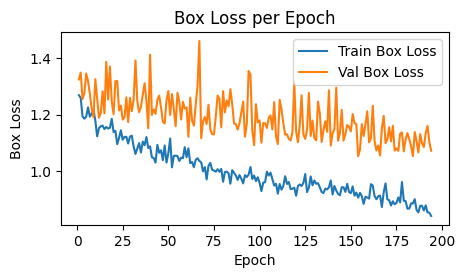

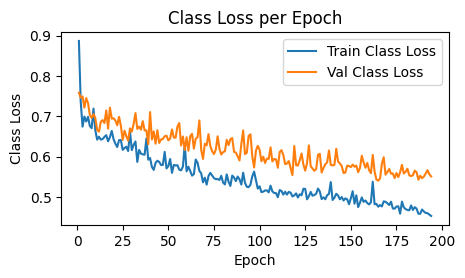

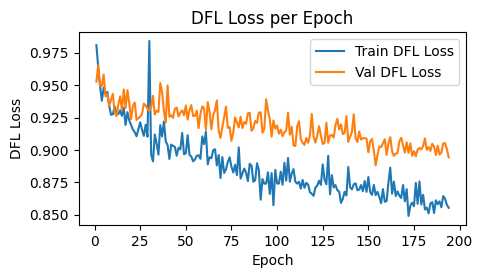

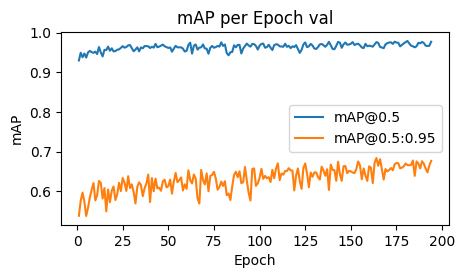

In [ ]:
# Pad naar je trainingsresultaten
df = pd.read_csv('/content/drive/MyDrive/yolo_runs/runs/detect/train3/results.csv')

# --- Plot 1: Box Loss ---
plt.figure(figsize=(5, 2.5))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss per Epoch')
plt.legend()
plt.show()

# --- Plot 2: Class Loss ---
plt.figure(figsize=(5, 2.5))
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss per Epoch')
plt.legend()
plt.show()

# --- Plot 3: DFL Loss ---
plt.figure(figsize=(5, 2.5))
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.title('DFL Loss per Epoch')
plt.legend()
plt.show()

# Plot mAP
plt.figure(figsize=(5, 2.5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP per Epoch val')
plt.legend()
plt.show()


# TFLite

In [ ]:
from ultralytics import YOLO
from ultralytics.utils.torch_utils import model_info
model_path = "/content/drive/MyDrive/yolo_runs/runs/detect/train3/weights/best.pt"
model = YOLO(model_path)
info = model_info(model.model, imgsz=160, verbose=True)

YOLO11n summary: 181 layers, 2,590,035 parameters, 0 gradients, 0.4 GFLOPs


In [ ]:

print(model.model.names)
print("Aantal klassen:", len(model.model.names))


{0: 'display'}
Aantal klassen: 1


In [ ]:
model = YOLO("/content/drive/MyDrive/yolo_runs/runs/detect/train3/weights/best.pt")
model.export(format="onnx", imgsz=160, dynamic=False)  # zorgt dat input shape flexibel blijft

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolo_runs/runs/detect/train3/weights/best.pt' with input shape (1, 3, 160, 160) BCHW and output shape(s) (1, 5, 525) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 7.5s, saved as '/content/drive/MyDrive/yolo_runs/runs/detect/train3/weights/best.onnx' (9.9 MB)

Export complete (8.0s)
Results saved to /content/dri

'/content/drive/MyDrive/yolo_runs/runs/detect/train3/weights/best.onnx'